In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading data from Google Drive


In [8]:
file_id = '1gSbDCCFzBuIQv0TihYC927MVLWmyrvfZ'
url = f'https://drive.google.com/uc?id={file_id}'

Data Preparation
In this step, we separate the target variable (Outcome) from the attribute data:

In [9]:
data = pd.read_csv(url)
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
data.shape

(768, 9)

# ایجاد نمودار از داده‌ها  با عرض 8 و ارتفاع 6 
# Create a chart from data with width 8 and height 6

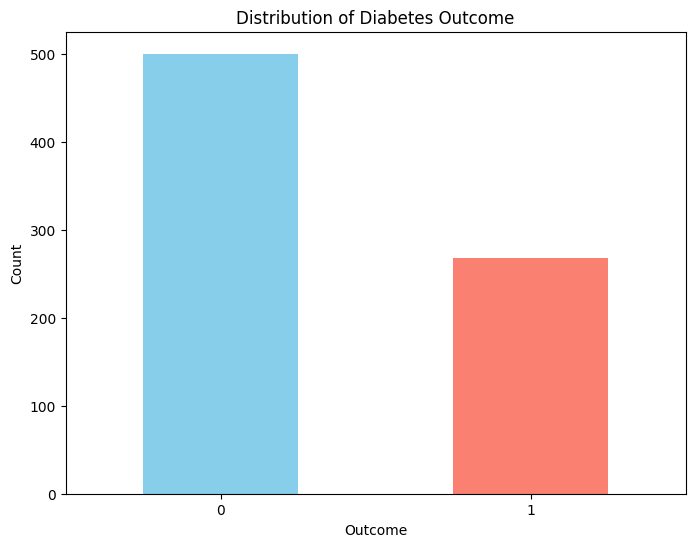

In [22]:
plt.figure(figsize=(8, 6)) 
data['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon']) 
plt.title('Distribution of Diabetes Outcome') 
plt.xlabel('Outcome') 
plt.ylabel('Count') 
plt.xticks(rotation=0) 
plt.show()


In [11]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [12]:
x=np.array(x)
y=np.array(y)

Data Standardization
To improve model performance, we standardize feature data:

In [13]:
from sklearn.preprocessing import StandardScaler
sklearn=StandardScaler()
x= sklearn.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

Splitting the data into training and testing sets
The data is split into two training and testing sets in a ratio of 80/20:

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

In [15]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [16]:
x_test.shape,y_train.shape

((154, 8), (614,))

SVM Model Training
The SVM model is built and trained with the rbf kernel:

In [17]:
from sklearn import svm
model=svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
#svR برای رگریشن هست

SVC()

Model Prediction and Evaluation
In this step, the model predicts for training and testing data and its precision, recall, and accuracy are evaluated.

In [18]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, recall_score,precision_score 
acc_train=accuracy_score(y_train,y_pred_train)
# حالا همین کار را مجدد برای داده تست میکنم
acc_test=accuracy_score(y_test,y_pred_test)

# این جوری هم میشه نوشت = It can also be written like this.

# acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
# acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)
acc_train*100,acc_test*100


(83.38762214983714, 70.77922077922078)

حالا میخواهیم روی اینا فقط امتحان کنیم-  / recall , precision

In [20]:
r=recall_score(y_test,y_pred_test)
p=precision_score(y_test,y_pred_test)
r*100 , p*100

(50.0, 53.333333333333336)

Testing different kernels

تست کرنل‌های مختلف

In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = svm.SVC(kernel=kernel)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred_test) * 100
    recall = recall_score(y_test, y_pred_test) * 100
    precision = precision_score(y_test, y_pred_test) * 100
    
    results[kernel] = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

for kernel in results:
    print(f"Results with {kernel} kernel:")
    print(f"  Accuracy: {results[kernel]['accuracy']:.2f}%")
    print(f"  Recall: {results[kernel]['recall']:.2f}%")
    print(f"  Precision: {results[kernel]['precision']:.2f}%\n")



Results with linear kernel:
  Accuracy: 75.32%
  Recall: 58.33%
  Precision: 60.87%

Results with poly kernel:
  Accuracy: 71.43%
  Recall: 35.42%
  Precision: 56.67%

Results with rbf kernel:
  Accuracy: 70.78%
  Recall: 50.00%
  Precision: 53.33%

Results with sigmoid kernel:
  Accuracy: 72.73%
  Recall: 52.08%
  Precision: 56.82%



Conclusion: The rbf kernel usually performs best due to its flexibility and better ability to handle complex data. However, results may vary depending on the type and characteristics of your data.